# 集成速度陀螺仪数据
汽车的**横摆角速度**可以通过**速率陀螺仪**来测量。

横摆角速度指的是汽车以每秒弧度的方向的变化率，并且由于汽车的前进方向通常由希腊字母 $\theta$（theta）表示，所以横摆**角速度**由$\dot{\theta}$（theta dot）表示。

对横摆角速度进行集成可以改变汽车整体的行驶方向。

In [1]:
from helpers import process_data, get_derivative_from_data
from matplotlib import pyplot as plt

PARALLEL_PARK_DATA = process_data("parallel_park.pickle")

TIMESTAMPS    = [row[0] for row in PARALLEL_PARK_DATA]
DISPLACEMENTS = [row[1] for row in PARALLEL_PARK_DATA]
YAW_RATES     = [row[2] for row in PARALLEL_PARK_DATA]
ACCELERATIONS = [row[3] for row in PARALLEL_PARK_DATA]

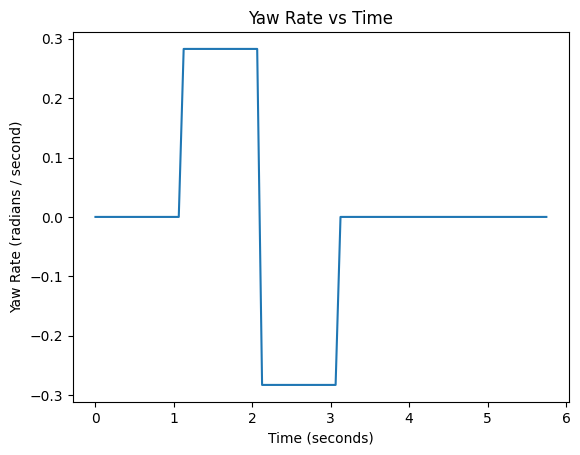

In [2]:
plt.title("Yaw Rate vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Yaw Rate (radians / second)")
plt.plot(TIMESTAMPS, YAW_RATES)
plt.show()

下面是我对这些数据的看法

**从 t=0 到 t=1**: 横摆角速度为零，因此车轮是直的（或者车辆没有移动）。这表示汽车正在直线后退。

**从 t=1 到 t=2**: 这表示司机正在将方向盘严格切到右侧并保持后退。由于横摆角速度不为零，这意味着车辆正在转弯。

**从 t=2 到 t=3**: 这表示司机将车轮切回左侧进行矫直。

**t=3 之后**: 车辆没有转弯，所以它可能只是通过缓慢前进和/或后退来调整其位置。

### 你的工作
在该 notebook 中，你需要自己编写`get_integral_from_data`函数，然后使用该函数在汽车行驶时跟踪它的行驶方向。

首先，看一看当你的函数正常运行时，综合速度陀螺仪数据应该是什么样子的。

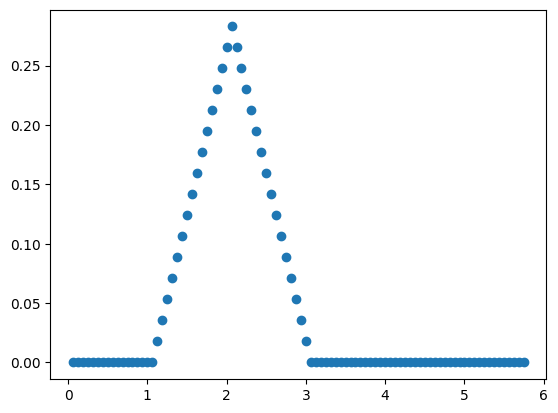

In [3]:
from helpers import get_integral_from_data as solution_integral

thetas = solution_integral(YAW_RATES, TIMESTAMPS)

plt.scatter(TIMESTAMPS[1:], thetas)
plt.show()

正如你所看到的，车辆的行驶方向最初是$\theta = 0 \text{ radians}$。从$t=1$到$t=2$，标题增加到最大约$0.28 \text{ radians}$（大约16度）。

In [6]:
import numpy as np
def get_integral_from_data(data, times):
    # TODO - write integration code!
    thetas = []
    for i in range(len(data)):
        if i == 0:
            thetas.append(0)
        else:
            thetas.append(thetas[i-1] + data[i-1])
    return thetas[1:]


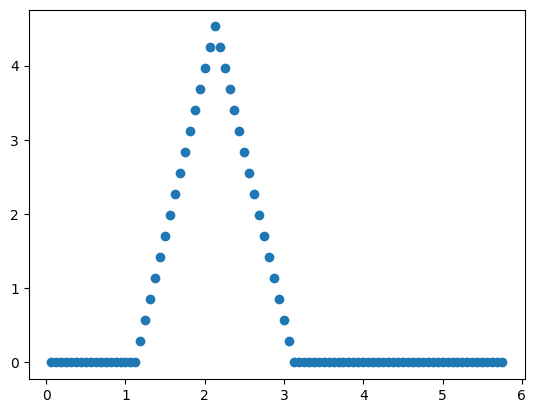

In [7]:
# Visual Testing - Compare the result of your 
# integration code to the plot above

thetas = get_integral_from_data(YAW_RATES, TIMESTAMPS)

plt.scatter(TIMESTAMPS[1:], thetas)
plt.show()